In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_excel('DA_TEST_1/customers (UK).xlsx',sheet_name='customer info')

In [3]:
items = pd.read_excel('DA_TEST_1/customers (UK).xlsx',sheet_name='Items')

In [4]:
orders = pd.read_excel('DA_TEST_1/customers (UK).xlsx',sheet_name='Customer transactions')

In [5]:
customers.head(10)

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
5,5,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,2015-12-23,F,1979-03-27,Y
6,6,Ad0.410135716954602,Tan0.662463855720801,GER - Germany,2015-12-23,M,1984-06-01,N
7,7,Ev0.291189764697797,Kh0.766529502176661,GER - Germany,2015-12-24,F,1970-11-12,Y
8,8,S0.892783416837388,WEN0.271074390106408,FR - France,2015-12-28,M,1991-02-28,Y
9,9,Chok0.637930969851357,SW0.984189910495377,FR - France,2015-04-01,NaN,1984-02-14,Y


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          770 non-null    int64         
 1   FirstName   770 non-null    object        
 2   LastName    770 non-null    object        
 3   Country     770 non-null    object        
 4   DateJoined  770 non-null    datetime64[ns]
 5   Gender      519 non-null    object        
 6   Birthday    770 non-null    datetime64[ns]
 7   Newsletter  770 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 48.2+ KB


In [7]:
customers.isnull().sum()

ID              0
FirstName       0
LastName        0
Country         0
DateJoined      0
Gender        251
Birthday        0
Newsletter      0
dtype: int64

In [8]:
customers.Gender = customers['Gender'].replace(np.nan,'Others')

In [9]:
customers.isnull().sum()

ID            0
FirstName     0
LastName      0
Country       0
DateJoined    0
Gender        0
Birthday      0
Newsletter    0
dtype: int64

In [10]:
customers.duplicated().sum()

0

In [11]:
customers['ID'] = customers['ID'].astype(str)
items['ItemID'] = items['ItemID'].astype(str)
orders['OrderID'] = orders['OrderID'].astype(str)
orders['CustomerID'] = orders['CustomerID'].astype(str)
orders['ItemID'] = orders['ItemID'].astype(str)

In [12]:
#Profit for each product
items['Profit'] = items['SellPrice']-items['CostPrice']

In [13]:
#Drop First Name and Last Name
customers.drop('FirstName',axis=1,inplace=True)
customers.drop('LastName',axis=1,inplace=True)

In [14]:
#Calculate age
customers['Age'] = 2020 - customers['Birthday'].dt.year
customers.drop('Birthday',axis=1,inplace=True)

AGE

Text(0.5, 1.0, "Distribution of Customer's Age")

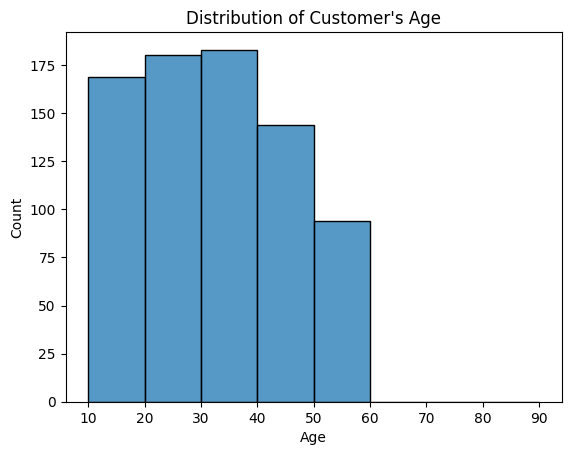

In [15]:
sns.histplot(data=customers, x="Age", bins = list(range(10, 100, 10)))
plt.title("Distribution of Customer's Age")

==> We can see from the above summary that most of the customers belong in the age range of 10-60

COUNTRY

In [16]:
customers['Country'].value_counts()

GER - Germany          321
FR - France            256
IT - Italy             128
UK - United Kingdom     65
Name: Country, dtype: int64

In [17]:
customers['Country'].unique()

array(['FR - France', 'GER - Germany', 'UK - United Kingdom',
       'IT - Italy'], dtype=object)

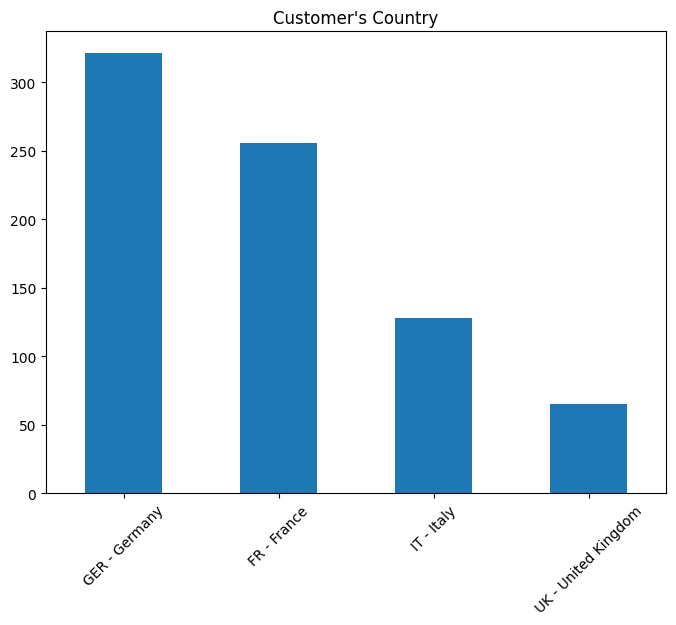

In [18]:
customers['Country'].value_counts(normalize=False).plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title("Customer's Country");

==> It is seen from above summary that most of our customers are from Germany and France

GENDER

In [19]:
customers['Gender'].value_counts()

F         262
M         257
Others    251
Name: Gender, dtype: int64

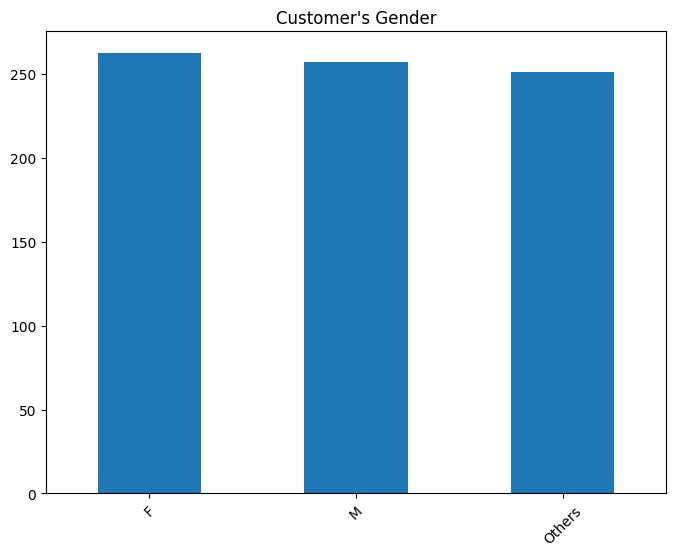

In [20]:
customers['Gender'].value_counts(normalize=False).plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title("Customer's Gender");

In [21]:
customers.drop('DateJoined',axis=1,inplace=True)

In [22]:
customers['Newsletter'].replace(('Y','N'),(1,0),inplace=True)

In [23]:
customers['Country'].replace(('GER - Germany','FR - France','IT - Italy','UK - United Kingdom'),(3,2,1,0),inplace=True)
customers['Gender'].replace(('F','M','Others'),(2,1,0),inplace=True)

In [28]:
customers = pd.get_dummies(customers,columns=['Country'],drop_first=True)
customers = pd.get_dummies(customers,columns=['Gender'],drop_first=True)

In [24]:
df1 = pd.merge(orders,items[['ItemID','Profit']],on='ItemID', how='left')
df1

,OrderID,CustomerID,ItemID,TransactionDate,Channel,Profit
0,0,0,352,2020-03-21,In Store,309
1,0,0,3433,2020-07-14,In Store,472
2,0,0,11162,2020-08-09,In Store,191
3,0,0,13011,2020-12-07,In Store,204
4,0,0,13885,2020-11-08,In Store,1138
...,...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store,835
25209,8361,769,13162,2020-02-04,In Store,887
25210,8362,769,8727,2020-11-18,In Store,139
25211,8362,769,13065,2020-05-11,In Store,740


In [25]:
df2 = df1.groupby('CustomerID').Profit.agg(sum)
df2

CustomerID
0      21999
1      24976
10     27228
100     7033
101    34139
       ...  
95     22915
96      4107
97      4065
98      4710
99     19506
Name: Profit, Length: 770, dtype: int64

In [26]:
customers.rename(columns={'ID':'CustomerID'},inplace=True)

In [27]:
customers = customers.merge(df2,how='inner',on='CustomerID')

In [45]:
customers

,CustomerID,Country,Gender,Newsletter,Age,Profit
0,0,2,0,0,52,21999
1,1,3,1,1,11,24976
2,2,2,2,1,30,12399
3,3,0,1,0,46,9492
4,4,1,1,0,39,25137
...,...,...,...,...,...,...
765,765,3,2,0,31,20151
766,766,3,0,1,55,3487
767,767,3,1,1,40,31652
768,768,3,1,1,40,21258


In [29]:
df = customers.drop('CustomerID',axis=1)

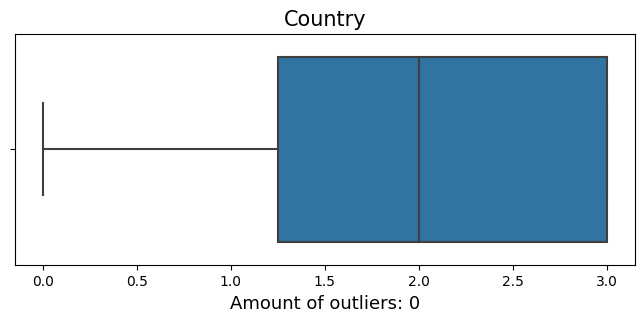

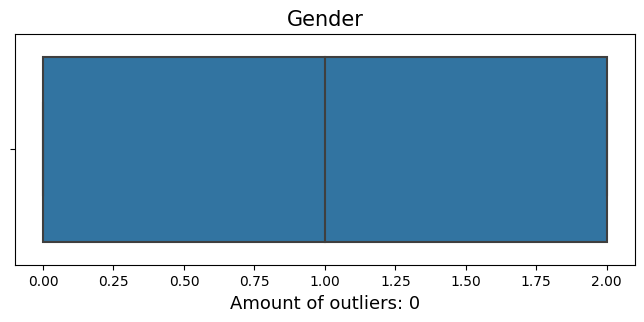

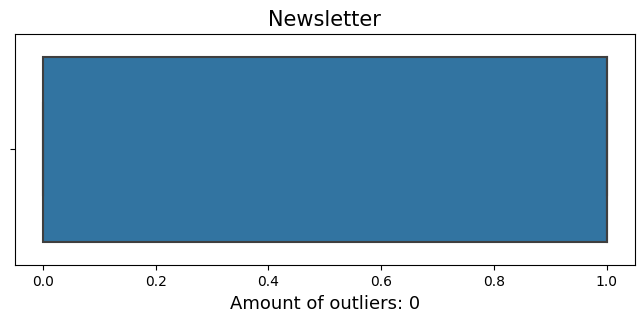

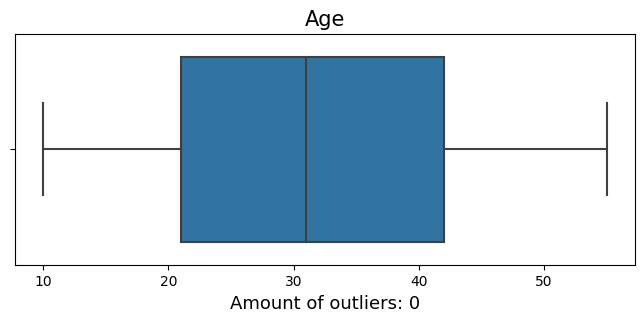

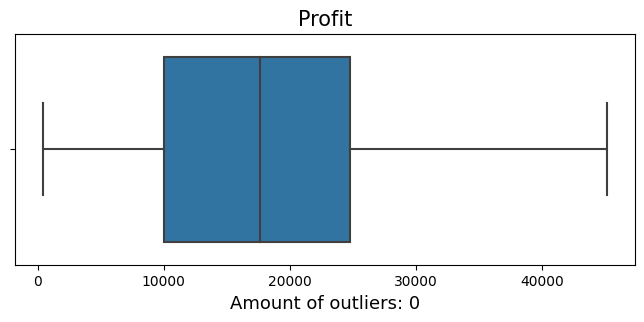

In [31]:
cont = 0
for col in df.columns:

    fig, ax = plt.subplots(figsize=(8, 3))

    sns.boxplot(x=df[col], ax=ax)

    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    ax.set_xlabel(f'Amount of outliers: {df[(df[col] >= upper_bound) | (df[col] <= lower_bound)].shape[0]}', fontsize=13)
    ax.set_title(col.capitalize(), fontsize=15)

    cont += 1

    plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [33]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(customers)

In [34]:
#elbow

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(df_scaled)
 sse.append(kmeans.inertia_)

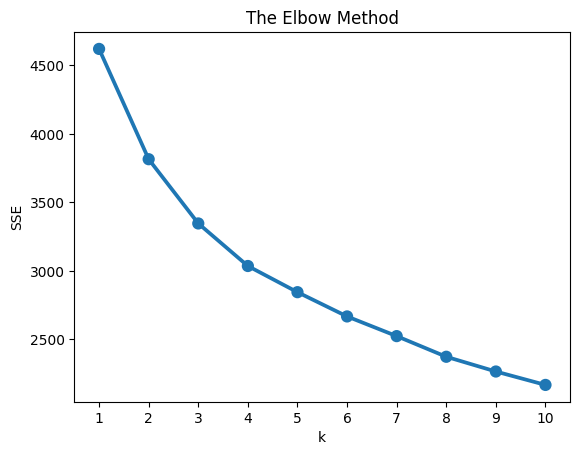

In [35]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=sse)
plt.savefig("Elbow.png")

In [36]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = sse,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 4


In [37]:
from sklearn.metrics import silhouette_score

In [38]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(df_scaled)
 score = silhouette_score(df_scaled, kmeans.labels_)
 silhouette_coefficients.append(score)

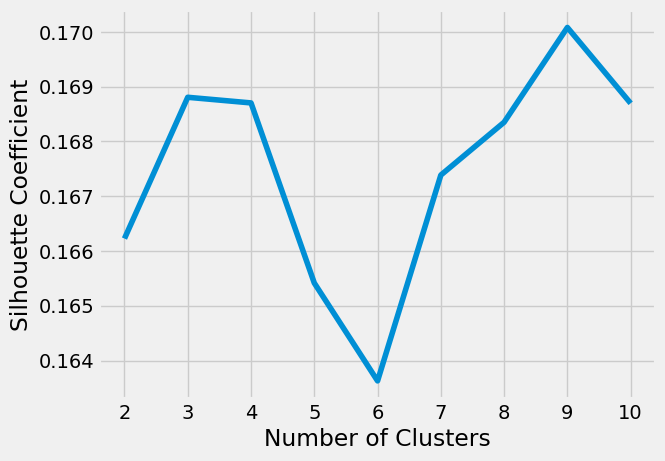

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [40]:
# reducing dimensionality with PCA
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
pca = PCA(2)
cosine = cosine_similarity(df_scaled)

pca_results = pca.fit_transform(cosine)
pca_results.shape

(770, 2)

In [49]:
n_cluster = 3

In [50]:
kmeans = KMeans(n_cluster, n_init=10, random_state=0).fit(pca_results)

In [51]:
label = kmeans.labels_

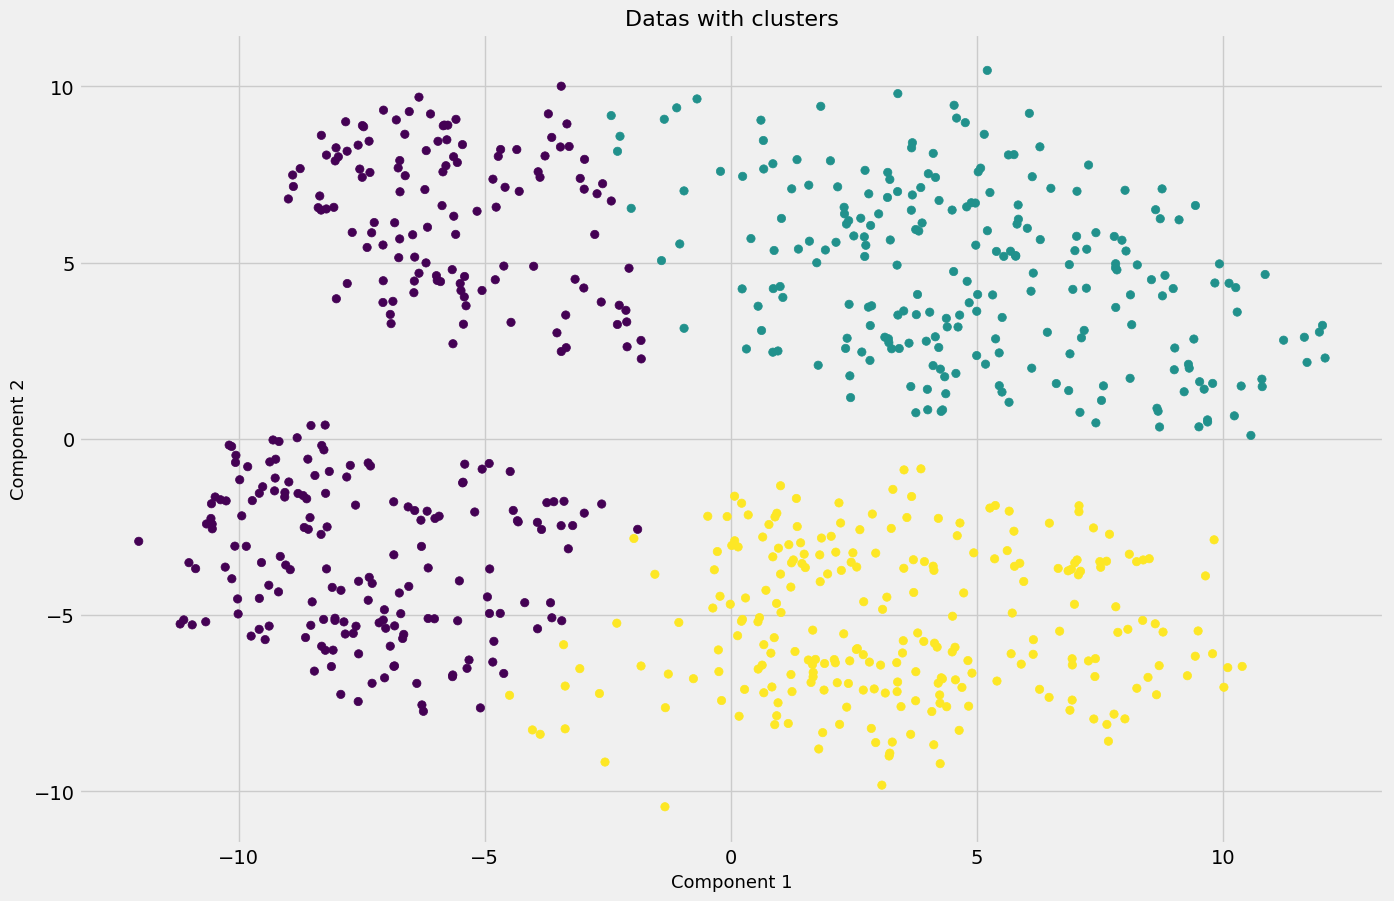

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(pca_results[:, 0], pca_results[:, 1], c=label)

ax.set_title('Datas with clusters', fontsize=16)

ax.set_xlabel('Component 1', fontsize=13)
ax.set_ylabel('Component 2', fontsize=13)

plt.show()